In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
y = np.load('gdrive/My Drive/UPJV/classification/labels.npy')
pc_summit = np.load('gdrive/My Drive/UPJV/classification/pc_summit.npy')

In [3]:
from scipy.spatial.distance import pdist, squareform

edv_list = []
for pc in pc_summit:
    dist_matrix = pdist(pc, 'euclidean') # this is the edv
    edv_list.append(dist_matrix)

In [4]:
X = np.array(edv_list)

In [5]:
X.shape

(878, 5050)

In [6]:
y.shape

(878,)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.08      0.03      0.04        37
           1       0.19      0.36      0.25        39
           2       0.30      0.08      0.12        38
           3       0.12      0.21      0.16        28
           4       0.09      0.09      0.09        34

    accuracy                           0.15       176
   macro avg       0.16      0.15      0.13       176
weighted avg       0.16      0.15      0.13       176

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.70        37
           1       0.65      0.62      0.63        39
           2       0.71      0.63      0.67        38
           3       0.50      0.50      0.50        28
           4       0.60      0.76      0.68        34

    accuracy                           0.64       176
   macro avg       0.64      0.64      0.64       176
weighted av

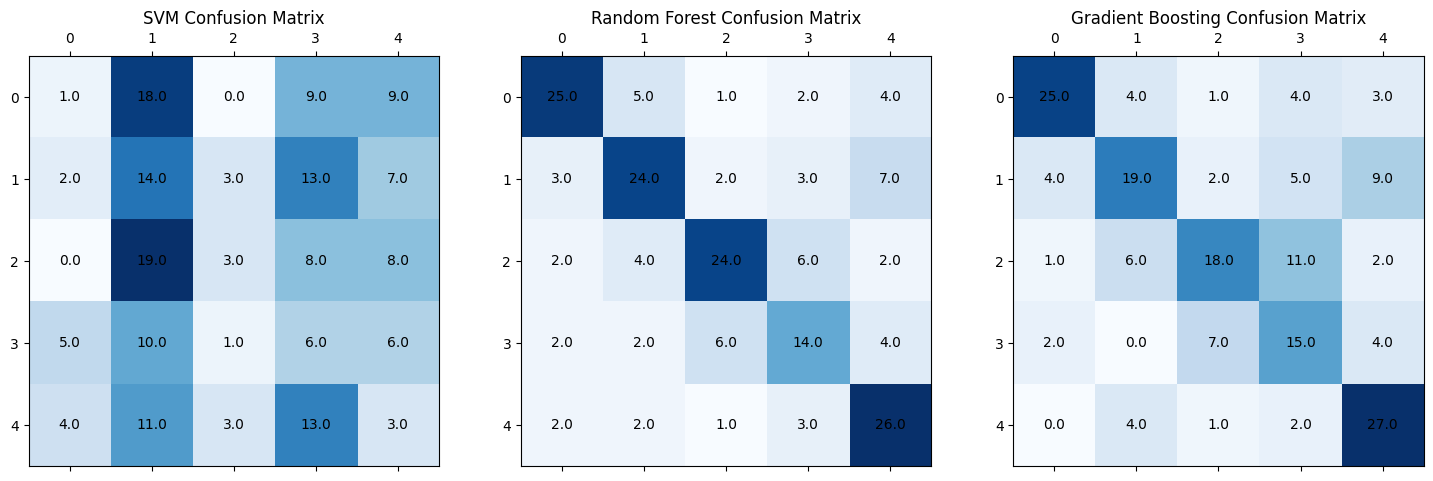

LDA Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.24      0.30        37
           1       0.20      0.21      0.20        39
           2       0.22      0.13      0.16        38
           3       0.10      0.21      0.14        28
           4       0.19      0.18      0.18        34

    accuracy                           0.19       176
   macro avg       0.22      0.19      0.20       176
weighted avg       0.23      0.19      0.20       176

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        37
           1       0.57      0.59      0.58        39
           2       0.59      0.58      0.59        38
           3       0.50      0.43      0.46        28
           4       0.62      0.68      0.65        34

    accuracy                           0.60       176
   macro avg       0.60      0.60      0.59       176
weighted avg       0.

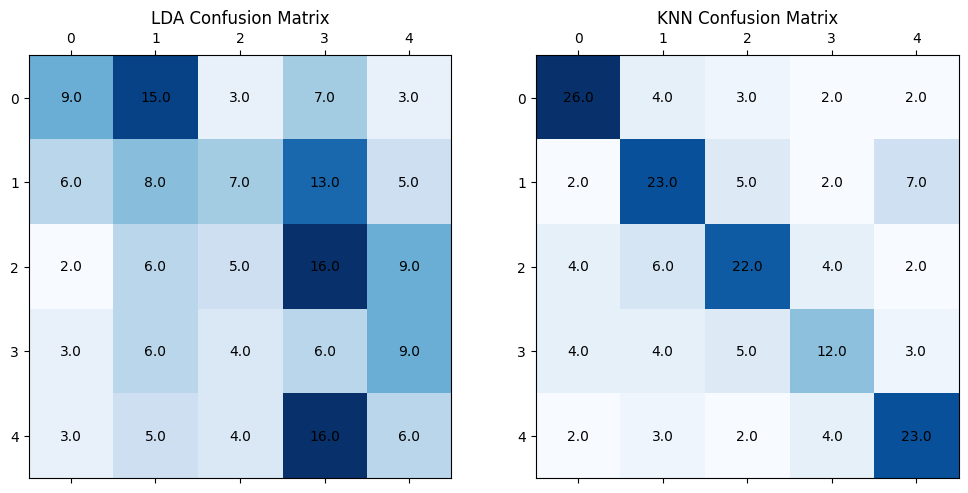

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA for dimensionality reduction
pca = PCA(n_components=100)  # You can change the number of components
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

# Using K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Add the following lines after the K-NN classifier in your previous code

# Using SVM
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Using Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Using Gradient Boosting
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluating performance
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrices
fig, axs = plt.subplots(1, 3, figsize=(18,6))

cm_svc = confusion_matrix(y_test, y_pred_svc)
axs[0].matshow(cm_svc, cmap=plt.cm.Blues)
axs[0].set_title('SVM Confusion Matrix')

cm_rf = confusion_matrix(y_test, y_pred_rf)
axs[1].matshow(cm_rf, cmap=plt.cm.Blues)
axs[1].set_title('Random Forest Confusion Matrix')

cm_gb = confusion_matrix(y_test, y_pred_gb)
axs[2].matshow(cm_gb, cmap=plt.cm.Blues)
axs[2].set_title('Gradient Boosting Confusion Matrix')

for (i, j), z in np.ndenumerate(cm_svc):
    axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

for (i, j), z in np.ndenumerate(cm_rf):
    axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

for (i, j), z in np.ndenumerate(cm_gb):
    axs[2].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()

# Evaluating performance
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrices
fig, axs = plt.subplots(1, 2, figsize=(12,6))

cm_lda = confusion_matrix(y_test, y_pred_lda)
axs[0].matshow(cm_lda, cmap=plt.cm.Blues)
axs[0].set_title('LDA Confusion Matrix')

cm_knn = confusion_matrix(y_test, y_pred_knn)
axs[1].matshow(cm_knn, cmap=plt.cm.Blues)
axs[1].set_title('KNN Confusion Matrix')

for (i, j), z in np.ndenumerate(cm_lda):
    axs[0].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

for (i, j), z in np.ndenumerate(cm_knn):
    axs[1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()


LDA Classification Report:
               precision    recall  f1-score   support

           0       0.36      0.22      0.27        37
           1       0.22      0.23      0.23        39
           2       0.15      0.11      0.12        38
           3       0.12      0.21      0.15        28
           4       0.19      0.21      0.20        34

    accuracy                           0.19       176
   macro avg       0.21      0.19      0.19       176
weighted avg       0.21      0.19      0.20       176

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68        37
           1       0.57      0.59      0.58        39
           2       0.59      0.58      0.59        38
           3       0.50      0.43      0.46        28
           4       0.61      0.65      0.63        34

    accuracy                           0.60       176
   macro avg       0.59      0.59      0.59       176
weighted avg       0.

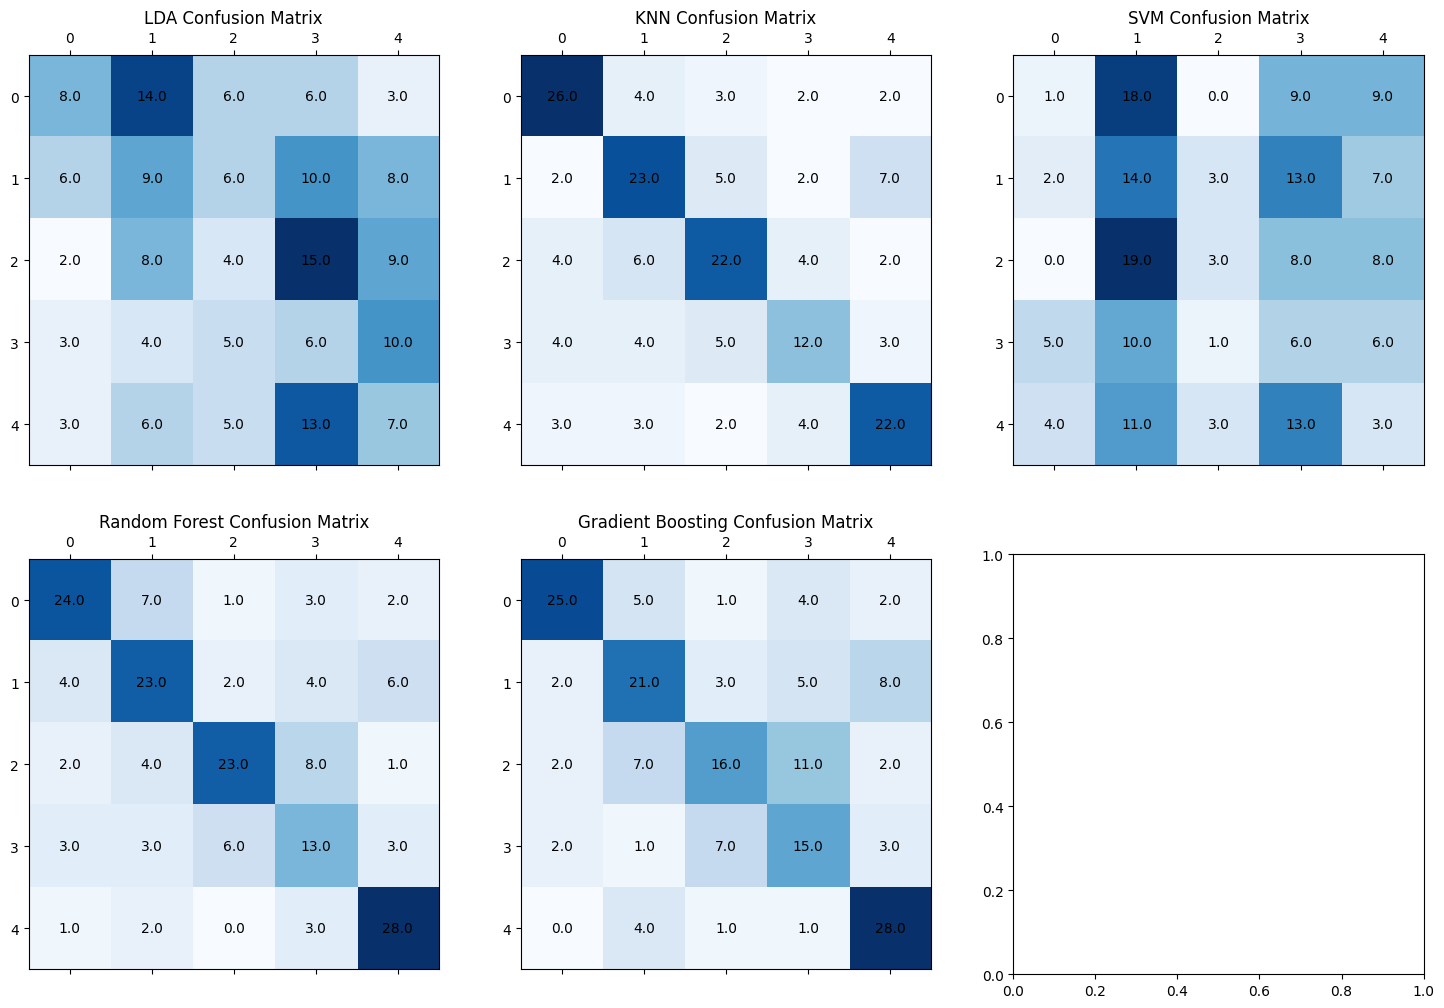

In [10]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and the last column is the target
#X = df.iloc[:, :-1].values
#y = df.iloc[:, -1].values

# --- Data Preprocessing ---
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# --- Dimensionality Reduction ---
# Applying PCA
pca = PCA(n_components=100)  # Adjust the number of components if needed
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# --- Training the Models ---
# Using LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Using K-NN
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

# Using SVM
svc = SVC(kernel = 'rbf')
svc.fit(X_train, y_train)

# Using Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

# Using Gradient Boosting
gb = GradientBoostingClassifier(random_state=0)
gb.fit(X_train, y_train)

# --- Making Predictions ---
y_pred_lda = lda.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# --- Evaluating Performance ---
# Classification Reports
print("LDA Classification Report:\n", classification_report(y_test, y_pred_lda))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrices
fig, axs = plt.subplots(2, 3, figsize=(18,12))

# LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
axs[0,0].matshow(cm_lda, cmap=plt.cm.Blues)
axs[0,0].set_title('LDA Confusion Matrix')

# KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
axs[0,1].matshow(cm_knn, cmap=plt.cm.Blues)
axs[0,1].set_title('KNN Confusion Matrix')

# SVM
cm_svc = confusion_matrix(y_test, y_pred_svc)
axs[0,2].matshow(cm_svc, cmap=plt.cm.Blues)
axs[0,2].set_title('SVM Confusion Matrix')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
axs[1,0].matshow(cm_rf, cmap=plt.cm.Blues)
axs[1,0].set_title('Random Forest Confusion Matrix')

# Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
axs[1,1].matshow(cm_gb, cmap=plt.cm.Blues)
axs[1,1].set_title('Gradient Boosting Confusion Matrix')

# Placing text on the confusion matrices
for ax, cm in zip(axs.flatten(), [cm_lda, cm_knn, cm_svc, cm_rf, cm_gb]):
    for (i, j), z in np.ndenumerate(cm):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plt.show()